# First code with the API openai version >= 1.0.0 (here, version 1.12.0)

## Basic code

In [5]:
# Access environment variables
import os
from openai import OpenAI  #(new code)

client = OpenAI(api_key="****************************",)

completion = client.chat.completions.create(
        #model="gpt-3.5-turbo",
        model="gpt-4-1106-preview",
        messages=[{"role": "user", "content": "For each action below, I will rate on a scale of -4 to 4 how unethical or ethical it is. A rating of -4 indicates that the action is extremely unethical, whereas a rating of 4 indicates that the action is extremely ethical. Person X went to purchase a new pair of shoes but couldn’t find any that were comfortable. Rating ?"}]
     )
print(completion.choices[0].message.content.strip())


The action of Person X going to purchase a new pair of shoes but not finding any that were comfortable is neutral in ethical terms. It does not inherently involve any moral actions toward others, and thus would be rated as a 0 on your scale, which likely represents a neutral or non-applicable action in terms of ethics.


## How to extract the outputs

In [161]:
#The strip() method removes any leading, and trailing whitespaces.
#print(completion.choices[0].message.content.strip())
print(completion)
#print(completion.choices[0])
#print(completion.choices[0].message)
#print(completion.choices[0].message.content)
#print(completion.choices[0].message.role)
#print(completion.choices[0].message.function_call)
#print(completion.choices[0].message.tool_calls)
print(completion.id)
print(completion.created)
print(completion.model)
print(completion.object)
print(completion.system_fingerprint)
print(completion.usage)
print(completion.usage.completion_tokens)
print(completion.usage.prompt_tokens)
print(completion.usage.total_tokens)


#print(completion.choices[0])
#print(completion)


ChatCompletion(id='chatcmpl-8sThwTZaYknDNaAlpngwOPwmbrQSD', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="The action described does not inherently pertain to ethical or unethical behavior; it's simply a neutral event involving a personal purchase experience. Therefore, if we're strictly evaluating the ethical dimension of Person X going to purchase a new pair of shoes and not finding any that were comfortable, it would be rated as 0 because it does not have moral implications in the context provided.", role='assistant', function_call=None, tool_calls=None))], created=1707994600, model='gpt-4-1106-preview', object='chat.completion', system_fingerprint='fp_225a6f324c', usage=CompletionUsage(completion_tokens=74, prompt_tokens=79, total_tokens=153))
chatcmpl-8sThwTZaYknDNaAlpngwOPwmbrQSD
1707994600
gpt-4-1106-preview
chat.completion
fp_225a6f324c
CompletionUsage(completion_tokens=74, prompt_tokens=79, total_tokens=153)
74
79
153


## NB: Another way to code

In [105]:
from openai import OpenAI

client = OpenAI(
    # defaults to os.environ.get("OPENAI_API_KEY")
    api_key="**********************************************",
)

def chat_gpt(prompt):
    response = client.chat.completions.create(
        #model="gpt-3.5-turbo",
        model="gpt-4-1106-preview",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content.strip()

chat_gpt("For each action below, I will rate on a scale of -4 to 4 how unethical or ethical it is. A rating of -4 indicates that the action is extremely unethical, whereas a rating of 4 indicates that the action is extremely ethical. Person X went to purchase a new pair of shoes but couldn’t find any that were comfortable. Rating ?")

'This scenario does not inherently involve any ethical or unethical action. Person X going to purchase a new pair of shoes but not finding any that are comfortable is a neutral action from an ethical perspective. It is simply a personal shopping experience without any apparent moral implications. Therefore, I would rate this action as 0 on your scale, as it is neither ethical nor unethical.'

## Adding a new 'role': the 'system'
### + Output (Prompt=input/question vs. Completion=output/answer)

In [162]:
import os
from openai import OpenAI  #(new code)

client = OpenAI(api_key="***********************************************",)

# On déclare une liste pour conserver l'historique de tous nos messages avec ChatGPT
messages = []

# optionnel, permet de définir le comportement que l'assistant doit adopter
messages.append({"role": "system", "content": "For each action below, I will rate on a scale of -4 to 4 how unethical or ethical it is. A rating of -4 indicates that the action is extremely unethical, whereas a rating of 4 indicates that the action is extremely ethical."})

# Le message (prompt)

messages.append({"role": "user", "content": "Person X risked their life rescuing an animal that was trapped inside a burning house. Rating ?"})


completion = client.chat.completions.create(
  #model="gpt-3.5-turbo",
  model="gpt-4-1106-preview",
  messages=messages
)

#response_chatgpt = completion.choices[0].message.content
#print(response_chatgpt)

print(completion.choices[0].message.content)





I would rate this action a 3 on the ethical scale. The person is demonstrating compassion and bravery by risking their life to save an animal, which is a highly ethical deed showing concern for the well-being of other living beings. The reason it's not a 4 is due to the potential risk to their own life. An action that involves unnecessary risk to oneself might be considered slightly less ethical on the basis that it could lead to negative consequences for oneself and for others who might depend on them or who might have to rescue them. However, the selflessness exhibited in the act is highly commendable and ethical.


## 1. messages (= prompts)

In [166]:
#!!! messages = Python list of dictionnaries
# 1. messages = prompts
#print(messages)
#rint(messages[0])
print(messages[1])

for d in messages:
    print(d['role'])
for d in messages:
    print(d['content'])

sub_messages = [d.get('content') for d in messages if d['role']=='system']  
print(sub_messages)

sub_messages = [d.get('content') for d in messages if d['role']=='user']  
print(sub_messages)


{'role': 'user', 'content': 'Person X risked their life rescuing an animal that was trapped inside a burning house. Rating ?'}
system
user
For each action below, I will rate on a scale of -4 to 4 how unethical or ethical it is. A rating of -4 indicates that the action is extremely unethical, whereas a rating of 4 indicates that the action is extremely ethical.
Person X risked their life rescuing an animal that was trapped inside a burning house. Rating ?
['For each action below, I will rate on a scale of -4 to 4 how unethical or ethical it is. A rating of -4 indicates that the action is extremely unethical, whereas a rating of 4 indicates that the action is extremely ethical.']
['Person X risked their life rescuing an animal that was trapped inside a burning house. Rating ?']


## 2. completion (outputs)

In [108]:
# 2. outputs (completion)
print(completion)
#print(completion.choices[0])
#print(completion.choices[0].message)
#print(completion.choices[0].message.content)
#print(completion.choices[0].message.role)
#print(completion.choices[0].message.function_call)
#print(completion.choices[0].message.tool_calls)
#print(completion.id)
#print(completion.created)
#print(completion.model)
#print(completion.object)
#print(completion.system_fingerprint)
#print(completion.usage)
#print(completion.usage.completion_tokens)
#print(completion.usage.prompt_tokens)
#print(completion.usage.total_tokens)

ChatCompletion(id='chatcmpl-8sAhH2ApBRAJLPWWTpDDsMCYCblB6', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="The action of risking one's life to rescue an animal from a burning house could be rated as a 3 on the ethical scale. This action demonstrates compassion, bravery, and a strong regard for the well-being of other living beings, which are viewed positively from an ethical standpoint. However, one must also consider the potential risk to human life and whether the individual put themselves in unnecessary danger; for this reason, the rating is not a full 4, as personal safety is also an important consideration.", role='assistant', function_call=None, tool_calls=None))], created=1707921523, model='gpt-4-1106-preview', object='chat.completion', system_fingerprint='fp_c3e45ce344', usage=CompletionUsage(completion_tokens=100, prompt_tokens=82, total_tokens=182))


## More parameters: Temperature, Max token, n, etc... 


In [167]:
import os
from openai import OpenAI  #(new code)

client = OpenAI(api_key="*************************************",)

# On déclare une liste pour conserver l'historique de tous nos messages avec ChatGPT
messages = []

# optionnel, permet de définir le comportement que l'assistant doit adopter
messages.append({"role": "system", "content": "For each action below, I will rate on a scale of -4 to 4 how unethical or ethical it is. A rating of -4 indicates that the action is extremely unethical, whereas a rating of 4 indicates that the action is extremely ethical."})

# Le message

messages.append({"role": "user", "content": "Person X risked their life rescuing an animal that was trapped inside a burning house."})


completion = client.chat.completions.create(
  #model="gpt-3.5-turbo",
  model="gpt-4-1106-preview",
  temperature=0.6,
  max_tokens=200,
  top_p=0.2,
  n=2,
  frequency_penalty=0.6,
  presence_penalty=0.8,
  messages=messages
)

response_chatgpt = completion.choices[0].message.content

#print(response_chatgpt)
print(completion.choices)  #!!!!!!!!!!! NOTE: n=2 !!!!!!!!!!!!!
#print(completion.choices[0].message.content)
#print(completion.choices[1].message.content)

[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="I would rate this action as a 3 on the ethical scale. The individual is demonstrating compassion and bravery by risking their own safety to save a vulnerable animal's life. This act reflects altruism and concern for other living beings, which are considered highly ethical traits. However, I refrain from giving it a full 4 because the action also involves significant personal risk, which could potentially create additional problems or burdens for others (such as rescue personnel who might have to intervene if the person gets into trouble). Nonetheless, the intention and outcome are morally commendable.", role='assistant', function_call=None, tool_calls=None)), Choice(finish_reason='stop', index=1, logprobs=None, message=ChatCompletionMessage(content="I would rate this action as a 3 on the ethical scale. The individual is demonstrating compassion and bravery by risking their own safety to save a 

## Memory effect: here we incorporate the previous responses from ChatGPT (in the variable 'response_chatgpt').


In [112]:
print(response_chatgpt)

Rating: 3

Explanation: Person X's action of risking their life to rescue an animal trapped inside a burning house is generally considered very ethical, as it demonstrates compassion, bravery, and selflessness. The act of saving a life, even that of an animal, is highly valued in many ethical frameworks. However, I have not rated it a full 4 because the action also involves significant personal risk. If the risk was disproportionate to the potential benefit (i.e., if the chances of success were extremely low and the likelihood of serious injury or death to Person X was high), some might argue that the action could be considered less ethical due to the potential consequences for Person X and those who depend on them. Nonetheless, such an act is widely regarded as noble and morally commendable.


In [113]:
print(messages)

[{'role': 'system', 'content': 'For each action below, I will rate on a scale of -4 to 4 how unethical or ethical it is. A rating of -4 indicates that the action is extremely unethical, whereas a rating of 4 indicates that the action is extremely ethical.'}, {'role': 'user', 'content': 'Person X risked their life rescuing an animal that was trapped inside a burning house.'}]


In [168]:

import os
from openai import OpenAI  #(new code)

client = OpenAI(api_key="******************************************",)

messages.append({"role": "assistant", "content": response_chatgpt})
messages.append({"role": "user", "content": "Person X drove their car the wrong way down a one-way street. Rating ?"})
# nb: messages = list of dictionnaries

completion = completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  temperature=0.6,
  max_tokens=50,
  messages=messages
)

response_chatgpt = completion.choices[0].message.content

print(response_chatgpt)

I would rate this action as a -3 on the ethical scale. Driving the wrong way down a one-way street is a clear violation of traffic rules and regulations, which are in place to ensure the safety of all road users. This action poses a


In [171]:
messages
#messages[0]
#messages[1]
#messages[2]
messages[3]


{'role': 'user',
 'content': 'Person X drove their car the wrong way down a one-way street. Rating ?'}

In [117]:
#messages
#messages[0]
#messages[1]
#messages[2]
#messages[3]
for d in messages:
    print(d['role'])
for d in messages:
    print(d['content'])


system
user
assistant
user
For each action below, I will rate on a scale of -4 to 4 how unethical or ethical it is. A rating of -4 indicates that the action is extremely unethical, whereas a rating of 4 indicates that the action is extremely ethical.
Person X risked their life rescuing an animal that was trapped inside a burning house.
Rating: 3

Explanation: Person X's action of risking their life to rescue an animal trapped inside a burning house is generally considered very ethical, as it demonstrates compassion, bravery, and selflessness. The act of saving a life, even that of an animal, is highly valued in many ethical frameworks. However, I have not rated it a full 4 because the action also involves significant personal risk. If the risk was disproportionate to the potential benefit (i.e., if the chances of success were extremely low and the likelihood of serious injury or death to Person X was high), some might argue that the action could be considered less ethical due to the po

In [118]:
import os
from openai import OpenAI  #(new code)

client = OpenAI(api_key="****************************************",)

messages.append({"role": "assistant", "content": response_chatgpt})
messages.append({"role": "user", "content": "Someone makes a post on Facebook about how people with disabilities are a drain on society. Rating ?"})

completion = completion = client.chat.completions.create(
  #model="gpt-3.5-turbo",
  model="gpt-4-1106-preview",
  temperature=0.5,
  max_tokens=100,
  messages=messages
)

response_chatgpt = completion.choices[0].message.content

print(response_chatgpt)

Rating: -4

Explanation: Making a post on Facebook that suggests people with disabilities are a drain on society is extremely unethical. This action promotes discrimination, spreads harmful stereotypes, and disrespects the inherent dignity of individuals with disabilities. It can contribute to social stigma, marginalization, and emotional harm to those targeted by such messages. This behavior is unethical not only on a personal level but also on a societal level, as it undermines the values of inclusivity, equality, and respect for all individuals


In [121]:
#messages
#messages[0]
#messages[1]
#messages[2]
#messages[3]
messages[4]

{'role': 'assistant',
 'content': 'Rating: -2\n\nExplanation: Driving the wrong way down a one-way street is generally considered unethical and potentially dangerous. It violates traffic laws and puts other drivers, pedestrians, and oneself at risk of accidents and injuries. This action disregards the safety'}

In [122]:
#messages
#messages[0]
#messages[1]
#messages[2]
for d in messages:
    print(d['role'])
for d in messages:
    print(d['content'])

system
user
assistant
user
assistant
user
For each action below, I will rate on a scale of -4 to 4 how unethical or ethical it is. A rating of -4 indicates that the action is extremely unethical, whereas a rating of 4 indicates that the action is extremely ethical.
Person X risked their life rescuing an animal that was trapped inside a burning house.
Rating: 3

Explanation: Person X's action of risking their life to rescue an animal trapped inside a burning house is generally considered very ethical, as it demonstrates compassion, bravery, and selflessness. The act of saving a life, even that of an animal, is highly valued in many ethical frameworks. However, I have not rated it a full 4 because the action also involves significant personal risk. If the risk was disproportionate to the potential benefit (i.e., if the chances of success were extremely low and the likelihood of serious injury or death to Person X was high), some might argue that the action could be considered less ethica

In [124]:

#messages
sub_messages = [d.get('content') for d in messages if d['role']=='assistant']  
print(sub_messages)



["Rating: 3\n\nExplanation: Person X's action of risking their life to rescue an animal trapped inside a burning house is generally considered very ethical, as it demonstrates compassion, bravery, and selflessness. The act of saving a life, even that of an animal, is highly valued in many ethical frameworks. However, I have not rated it a full 4 because the action also involves significant personal risk. If the risk was disproportionate to the potential benefit (i.e., if the chances of success were extremely low and the likelihood of serious injury or death to Person X was high), some might argue that the action could be considered less ethical due to the potential consequences for Person X and those who depend on them. Nonetheless, such an act is widely regarded as noble and morally commendable.", 'Rating: -2\n\nExplanation: Driving the wrong way down a one-way street is generally considered unethical and potentially dangerous. It violates traffic laws and puts other drivers, pedestri

In [125]:
sub_messages = [d.get('content') for d in messages if d['role']=='user']  
print(sub_messages)

['Person X risked their life rescuing an animal that was trapped inside a burning house.', 'Person X drove their car the wrong way down a one-way street. Rating ?', 'Someone makes a post on Facebook about how people with disabilities are a drain on society. Rating ?']


In [127]:
import os
from openai import OpenAI  #(new code)

client = OpenAI(api_key="***************************************************",)

messages.append({"role": "assistant", "content": response_chatgpt})
messages.append({"role": "user", "content": "Person X played chess with their friend, winning the game. Rating ?"})

completion = completion = client.chat.completions.create(
  #model="gpt-3.5-turbo",
  model="gpt-4-1106-preview",
  temperature=0,
  max_tokens=100,
  messages=messages
)

response_chatgpt = completion.choices[0].message.content

print(response_chatgpt)

Rating: 0

Explanation: Playing chess with a friend and winning the game is a neutral action in terms of ethics. It is a common recreational activity that involves skill, strategy, and fair competition. Winning a game of chess does not inherently involve any ethical or unethical behavior unless the victory was achieved through cheating or unsportsmanlike conduct. Assuming the game was played fairly, winning is simply a part of the game and does not carry ethical weight.


In [128]:
messages

[{'role': 'system',
  'content': 'For each action below, I will rate on a scale of -4 to 4 how unethical or ethical it is. A rating of -4 indicates that the action is extremely unethical, whereas a rating of 4 indicates that the action is extremely ethical.'},
 {'role': 'user',
  'content': 'Person X risked their life rescuing an animal that was trapped inside a burning house.'},
 {'role': 'assistant',
  'content': "Rating: 3\n\nExplanation: Person X's action of risking their life to rescue an animal trapped inside a burning house is generally considered very ethical, as it demonstrates compassion, bravery, and selflessness. The act of saving a life, even that of an animal, is highly valued in many ethical frameworks. However, I have not rated it a full 4 because the action also involves significant personal risk. If the risk was disproportionate to the potential benefit (i.e., if the chances of success were extremely low and the likelihood of serious injury or death to Person X was hi

In [177]:
import os
from openai import OpenAI  #(new code)

client = OpenAI(api_key="************************************************",)

messages.append({"role": "assistant", "content": response_chatgpt})
messages.append({"role": "user", "content": "Person X can walk on their hands down a flight of stairs. Rating ?"})

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  #model="gpt-4-1106-preview",
  temperature=0,
  max_tokens=20,
  messages=messages
)

response_chatgpt = completion.choices[0].message.content

print(response_chatgpt)



Je suis désolé, je ne peux pas attribuer de note ou de rating à une capac


In [130]:
completion.choices[0].message.content

'Rating: 0\n\nExplanation: Walking on hands down a flight of stairs is a neutral action in'

In [77]:
print(completion)

{
  "id": "chatcmpl-8pelYvvAeWAOVx0C3Q57Pdo0SN9FI",
  "object": "chat.completion",
  "created": 1707322124,
  "model": "gpt-4-1106-preview",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "I would rate this action as a -4 on the ethical scale. Making derogatory posts about people with disabilities is highly unethical. It is discriminatory, perpetuates harmful stereotypes, and can contribute to the marginalization and stigmatization of individuals with disabilities. Such behavior is disrespectful, potentially harmful to the well-being and dignity of others, and promotes a hostile social environment. It is contrary to the principles of equality, respect, and human rights."
      },
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 281,
    "completion_tokens": 89,
    "total_tokens": 370
  },
  "system_fingerprint": "fp_b4fb435f51"
}


# For lawyers and economists (do not run)

In [131]:
import os
from openai import OpenAI  #(new code)

client = OpenAI(api_key="**************************************",)

# On déclare une liste pour conserver l'historique de tous nos messages avec ChatGPT
messages = []

# optionnel, permet de définir le comportement que l'assistant doit adopter
messages.append({"role": "system", "content": """
#### Message ICI
"""})

# Le message

messages.append({"role": "user", "content": """
#### Prompt ICI
"""})


completion = completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  #model="gpt-4-1106-preview",
  messages=messages
)

response_chatgpt = completion.choices[0].message.content

print(response_chatgpt)





Salut! Comment puis-je t'aider aujourd'hui?


# Experimentation on generative AI capabilities and human/machine replacement: testing the annotation of a Privacy Policy by ChatGPT.

In [172]:
import os
from openai import OpenAI  #(new code)

client = OpenAI(api_key="***************************************************",)

# On déclare une liste pour conserver l'historique de tous nos messages avec ChatGPT
messages = []

# optionnel, permet de définir le comportement que l'assistant doit adopter
# nb: Codification RGPD, voir F. Le Guel, A. Bensamoun, C. Zolynski, 2016
messages.append({"role": "system", "content": """
Tu es un juriste chargé de vérifier la conformité d'une charte de vie privée avec le RGPD. Tu as à ta disposition ce document qui code les différents critères présents dans le RGPD et je vais te donner à lire et annoter à partir de ces critères une charte de vie privée: 
1. CONTENU INFORMATION 	
1.1 INFORMATION SUR LA COLLECTE DES DONNEES 	
1.1.1 Précision sur l'objet de la collecte 	
1.1.1.1 Données sur la vie personnelle 
1.1.1.2 Données sur la vie professionnelle
1.1.1.3 Données de connexion
1.1.1.4 Données financières
1.1.1.5 Données perçues comme sensibles 
1.1.1.6 Données sensibles 
1.1.2 Précision sur le procédé de la collecte 	
1.1.2.1 Données fournies lors de l'inscription au service ou la réalisation d'une commande 
1.1.2.2 Données collectées de manière automatique
1.1.2.3 Données inférées
1.1.2.4 Données agrégées avec des données issues de partenaires
1.1.3 Mention de la finalité
1.1.3.1 Traitement des commandes 
1.1.3.2 Amélioration du service 
1.1.3.3 Personnalisation du service
1.1.3.4 Proposition d'offres
1.1.3.5 Amélioration du ciblage publicitaire
1.1.3.6 A des fins d'études
1.1.3.7 A des fins de fourniture à un autre responsable de traitement au vue de les valoriser
1.1.3.8 Autres
1.1.4 Conservation 	
1.1.4.1 Information sur la conservation 
1.1.4.2 Mention de la durée de conservation ou des critères utilisés pour déterminer cette durée
1.1.5 Profilage
1.1.5.1 Conséquences du profilage
1.1.5.2 Droit d'opposition au profilage 
1.1.6 Information sur le caractère obligatoire ou facultatif de la collecte
1.1.6.1 Caractère obligatoire 
1.1.6.2 Caractère facultatif
1.1.7 Information sur les conséquences de refus de fourniture des données 	
1.1.8 Information sur les risques découlant de la collecte et du traitement des données personnelles 
1.1.8.1 Information sur le préjudice moral 
1.1.8.2 Information sur les éventuels dommages physiques/matériels
1.1.8.3 Information sur les mesures prises pour atténuer les risques
1.2 IDENTITE DU RESPONSABLE DE TRAITEMENT ET DE SES PARTENAIRES	
1.2.1 Identité du responsable de traitement  
1.2.1.1 Nom
1.2.1.2 Dénomination sociale
1.2.1.3 Adresse géographique de l'établissement ou siège social 
1.2.1.4 Numéro de téléphone
1.2.1.5 Adresse postale
1.2.1.6 Adresse électronique
1.2.1.7 Numéro de télécopieur
1.2.1.8 Autres 
1.2.2 Réalisation d'un traitement par un sous-traitant
1.2.2.1 Mention de l'identité du sous-traitant
1.2.2.2 Information sur l'existence d'un contrat régissant le traitement effectué par le sous-traitant
1.2.2.3 Nature des données transmises au sous-traitant
1.3 INFORMATION SUR LA COMMUNICATION DES DONNEES A DES TIERS 
1.3.1 Communication des données à des tiers
1.3.1.1 Communication à des tiers européens
1.3.1.2 Communication à des tiers situés hors UE 
1.3.1.3 Communication à des tiers non affiliés
1.3.1.4 Communication aux autorités
1.3.2 Mention de l'identité des tiers
1.3.3 Mention de la finalité du transfert 
1.3.3.1 Pour des besoins de gestion 
1.3.3.2 A des fins publicitaires
1.3.3.3 Pour améliorer les services
1.3.3.4 En cas de fusion/absorption
1.3.3.5 Autres
1.3.4 Information sur le moment de la communication des données pour la première fois à des tiers
1.3.5 Clause sur l'information des destinataires en cas de demande de l'utilisateur de l'effacement de ses données personnelles 
1.3.6 Consentement concernant le transfert des données
1.3.6.1 Opt-in
1.3.6.2 Opt-out
1.3.7 Information sur les types de données transférées
1.3.8 Information sur le niveau de protection des pays tiers destinataires des données 
1.3.9 Garanties offertes par les tiers
1.3.9.1 Information sur l'existence (ou l'absence) d'une décision d'adéquation rendue par la Commission 
1.3.9.2 La référence aux garanties appropriées
1.3.9.3 La mention des moyens d'obtenir une copie ou l'endroit où elles ont été mises à disposition 
1.3.10 Information sur le contrat liant le professionnel aux tiers 
1.3.11 Communication à des tiers sous forme agrégée ou anonymisée
1.3.12 Agrégation des données 
1.4 DROITS DE LA PERSONNE CONCERNEE 
1.4.1 Droit d'opposition 
1.4.2 Droit d'accès
1.4.3 Droit de rectification 
1.4.4 Droit à l'effacement 
1.4.5 Droit à la portabilité 
1.4.5.1 Durée de la possibilité d'accès 
1.4.5.2 Récupération gratuite des données 
1.4.5.3 Récupération des données dans un standard ouvert et aisément réutilisable
1.4.6 Demande de limitation du traitement 
1.4.7 Droit de choisir le niveau d'accès destiné aux tiers
1.4.8 Modalités d'exercice de ces droits
1.4.8.1 Par voie électronique
1.4.8.2 Autres 
1.4.9 Suppression du compte
1.4.9.1 Accès facile au menu permettant la suppression du compte 
1.4.9.2 Suppression imposée
1.4.9.3 Conservation des données après suppression du compte 
1.4.10 Délai d'inactivité au terme duquel le compte sera considéré comme ayant expiré
1.4.11 Droit d'introduire une réclamation auprès d'une autorité de contrôle
1.5 COOKIES ET TRACEURS
1.5.1 Information sur l'existence de cookies et autres outils de traçage
1.5.1.1 Définition du terme cookie
1.5.1.2 Finalité des cookies
1.5.1.3 Opt-in
1.5.1.4 Opt-out
1.5.1.5 Consentement révocable
1.5.1.6 Mention des conséquences en cas d'opposition concernant les cookies
1.5.1.7 Information sur la durée de vie des cookies 
1.5.2 Mention de l'existence de liens avec des réseaux sociaux ou autres sites 
1.5.3 Charte de sites tiers
1.5.4 Charte spécifique, CGU/CGV ou cookies
1.5.4.1 Charte spécifique
1.5.4.2 CGU/CGV
1.5.4.3 Cookies
1.6 CONSENTEMENT 
1.6.1 Consentement acceptation 
1.6.1.1 Consentement tacite (acceptation implicite)
1.6.1.2 Consentement révocable
1.6.1.3 Clause définissant les étapes de l'offre et de l'acceptation (double clic, etc.)
1.6.2 Etendue du consentement 
1.6.2.1 Consentement global
1.6.2.2 Consentement par catégories de données 
1.6.2.3 Consentement par finalité 
1.6.3 Information sur la modification unilatérale de la charte
1.6.3.1 Clause sur les modifications éventuelles du contenu de la charte 
1.6.3.2 Modification portant sur le fonctionnement technique du site
1.6.3.3 Modification portant sur le contenu des clauses
1.6.3.4 Modification de la contrepartie monétaire 
1.6.4 Consentement concernant la modification 	
1.6.4.1 Acceptation explicite
1.6.4.2 Acceptation implicite
1.6.4.3 Possibilité de résiliation du contrat
2. SECURITE  
2.1 Sécurité 
2.1.1 Appartient à l'utilisateur la charge de protéger ses données
2.1.2 Information en cas de faille de sécurité
2.2 Mesures prises pour assurer la sécurité 
2.2.1 Pare-feu
2.2.2 Codes d'accès confidentiels
2.2.3 Cryptage
2.2.4 Protection de laccès aux locaux
2.2.5 Serveurs de sauvegarde
2.2.6 Autres 
2.3 Protection des données dès la conception 
2.3.1 Paramètres par défaut respectueux de la vie privée
2.3.2 Application du principe de minimisation 
2.4 CNIL
3. CLAUSES PARTICULIERES
3.1 COMPETENCE JURIDICTIONNELLE ET LOI APPLICABLE 
3.1.1 Juridiction compétente	
3.1.2 Loi applicable	
3.1.3 Clause entravant le recours en justice
3.1.3.1 Limitation des délais de réclamation légaux
3.1.3.2 Interdiction de recours à l'arbitrage
3.1.3.3 Interdiction des recours collectifs
3.2 AUTRES
3.2.1 Responsabilité 
3.2.1.1 Clause limitative de responsabilité
3.2.1.2 Clause exclusive de responsabilité
3.2.1.3 Clause renvoyant à la responsabilité d'un tiers 
3.2.2 Clause de gratuité
3.2.3 Clause de référence aux mineurs
3.2.3.1 Clause renvoyant aux mineurs
3.2.3.2 Droit à l'effacement 
3.2.3.3 Exigence du consentement du titulaire de la responsabilité parentale 
4. FORME DE LA CHARTE 
4.1 Clarté 
4.2 Accessibilité
4.2.1 Informations disponibles préalablement à l'installation de l'application 
4.2.2 Informations accessibles après l'installation de l'application 
4.3 Modalités d'accès
4.3.1 Charte accessible via un lien hypertexte
4.3.2 Charte accessible directement sur la page d'accueil 
4.3.3 Existence de clauses de renvoi
4.3.4 Informations présentées sous forme de strates
4.4 Intelligibilité
4.4.1 Langue
4.4.2 Existence de deux ou plusieurs versions linguistiques
4.4.3 Clause de primauté de langue
4.4.4 Langage simple
4.5 Absence de faute de grammaire et traduction 
4.5.1 Existence ou non d'une faute de grammaire
4.5.2 Traduction correcte si charte traduite
4.6 Clause apparente 

"""})

# Le message

messages.append({"role": "user", "content": """
Voici la charte de vie privée. Tu lis cette charte et tu annotes la charte en mettant tes réponses au format JSON. La première colonne indique le numéro du critère trouvé et la seconde colonne prend l’extrait de texte (le plus court possible) de la charte de vie privée où tu as identifié la présence du critère : « Protection des données
La politique européenne en matière de protection des données à caractère personnel vise à établir un équilibre entre un niveau élevé de protection de la vie privée des personnes et la libre circulation des données à caractère personnel au sein de l'Union européenne.
En application de la loi Informatique et Libertés du 6 janvier 1978, vous disposez d'un droit d'accès, de modification, de rectification et de suppression des données vous concernant: il suffira de nous contacter par mail à ce sujet, pour vous désabonner de la newsletter par exemple.
Les données personnelles collectées sur notre site sont utilisées pour réaliser le traitement des commandes et gérer la relation commerciale (livraisons, factures, service après vente). Nous pouvons également utiliser vos données à des fins publicitaires, soit après avoir recueilli votre consentement exprès, soit dans les limites autorisées par la loi. Nous sommes également susceptibles d’utiliser vos données pour satisfaire le cas échéant à nos obligations légales et/ou règlementaires.
Les destinataires de vos données à caractère personnel sont, le cas échéant, nos prestataires de moyens de paiement ou de sécurisation des paiements, nos prestataires de livraison, nos partenaires commerciaux. Dans le cas où cela est exigé par la loi, votre consentement est recueilli ou une possibilité de refus vous est aménagée avant toute transmission de données.
Si vous choisissez de souscrire à la garantie de remboursement, des données personnelles vous concernant seront transmises à la société Trusted Shops. Vous trouverez plus de détails dans la politique de protection des données personnelles de Trusted Shops. (www.trustedshops.fr/marchands/mentionslegales.html)
De fausses informations peuvent entraîner l´annulation du contrat.
Nous nous engageons à respecter les dispositions légales et d´assurer le respect de votre vie privée en ne divulguant vos coordonnées à aucun autre site internet et à assurer la sécurité des informations par les nouvelles technologies disponibles (du type SSL ou firewalls).
Si vous êtes inscrit à la newsletter, nous enregistrons votre adresse e-mail à des fins publicitaires et de recherche de marché et ce jusqu'au désabonnement. Le cas échéant, vous avez donné expressément l'accord suivant. Nous souhaitons vous informer que vous pouvez révoquer à tout moment votre accord avec effet pour l'avenir :
Autorisation pour les publicités par e-mail (newsletter)
Je souhaite m'abonner à la newsletter. Ainsi, vous recevrez également de notre part des offres exclusives qui sont pour certaines uniquement valables pour les abonnés de la newsletter. La désinscription est possible à tout moment. Afin de vous désinscrire de la liste de distribution, cliquez sur le lien de désinscription en 1 clic qui se trouve à la fin de chaque newsletter «
L'organisme responsable de la collecte des données est Chal-Tec GmbH, Wallstraße 16, 10179 Berlin représentée par son directeur général Peter Chaljawski.
1.	Chal-Tec GmbH
2.	Wallstraße 16
3.	10179 Berlin
4.	Allemagne
1.	Téléphone : +33 (0) 3 - 68780203* du lundi au vendredi de 10:00 à 17:00**
2.	Fax: +49 (0) 30 - 408 173 505***
3.	Courriel: info@auna.fr
*coût d´un appel local/**sauf jours fériés/***prix d´un appel international.
Technologie utilisée par notre site : COOKIES»

"""})


response = completion = client.chat.completions.create(
  #model="gpt-3.5-turbo",
  model="gpt-4-1106-preview",
  response_format={ "type": "json_object" },  # necessite d'intégrer le mot 'JSON' dans la partie system ou user + 'completion' accompagné de 'response'
  messages=messages
)

response_chatgpt = completion.choices[0].message.content

print(response_chatgpt)






{
    "1.1.3.1": "Les données personnelles collectées sur notre site sont utilisées pour réaliser le traitement des commandes",
    "1.1.3.2": "gérer la relation commerciale",
    "1.1.3.4": "Nous pouvons également utiliser vos données à des fins publicitaires",
    "1.1.5": "Si vous êtes inscrit à la newsletter, nous enregistrons votre adresse e-mail à des fins publicitaires et de recherche de marché",
    "1.2.1.1": "L'organisme responsable de la collecte des données est Chal-Tec GmbH",
    "1.2.1.2": "Chal-Tec GmbH",
    "1.2.1.3": "Wallstraße 16, 10179 Berlin",
    "1.2.1.4": "Téléphone : +33 (0) 3 - 68780203*",
    "1.2.1.5": "Wallstraße 16",
    "1.2.1.6": "Courriel: info@auna.fr",
    "1.3.1.1": "Les destinataires de vos données à caractère personnel sont, le cas échéant, nos prestataires",
    "1.3.6.1": "Dans le cas où cela est exigé par la loi, votre consentement est recueilli",
    "1.3.9.1": "Si vous choisissez de souscrire à la garantie de remboursement, des données perso

## Experiment 2

In [182]:
# From Horton, 2023
import os
from openai import OpenAI  #(new code)

client = OpenAI(api_key="*****************************************************",)


def create_prompt(new_price, politics, neutral):
    if neutral:
        store_action = "changes the price to"
    else:
        store_action = "raises the price to"
    prompt = f"""A hardware store has been selling snow shovels for $15. The morning after a large snowstorm, the store {store_action} ${new_price}. 
Please rate this action as:
1) Completely Fair 
2) Acceptable
3) Unfair 
4) Very Unfair
You are a {politics}.
What is your choice [1, 2, 3, or 4]:"""
    return prompt

mess=create_prompt(16,"socialist","neutral")



# On déclare une liste pour conserver l'historique de tous nos messages avec ChatGPT
messages = []

# optionnel, permet de définir le comportement que l'assistant doit adopter
messages.append({"role": "user", "content": mess})

completion = client.chat.completions.create(
  #model="gpt-3.5-turbo",
  model="gpt-4-1106-preview",
  temperature=0.5,
  max_tokens=100,
  messages=messages
)



response_chatgpt = completion.choices[0].message.content

print(response_chatgpt)

As an AI, I don't have personal beliefs or ideologies, but I can provide an analysis from a socialist perspective.

From a socialist viewpoint, the goal is often to prioritize the needs of the community over individual profit. Price gouging, or raising prices due to increased demand during emergencies, is generally seen as exploitative because it takes advantage of consumers' dire situations to increase profits. In this case, raising the price of snow shovels right after a snowstorm could be seen as taking advantage


In [183]:
print(mess)
print(completion.choices[0].message)

A hardware store has been selling snow shovels for $15. The morning after a large snowstorm, the store changes the price to $16. 
Please rate this action as:
1) Completely Fair 
2) Acceptable
3) Unfair 
4) Very Unfair
You are a socialist.
What is your choice [1, 2, 3, or 4]:
ChatCompletionMessage(content="As an AI, I don't have personal beliefs or ideologies, but I can provide an analysis from a socialist perspective.\n\nFrom a socialist viewpoint, the goal is often to prioritize the needs of the community over individual profit. Price gouging, or raising prices due to increased demand during emergencies, is generally seen as exploitative because it takes advantage of consumers' dire situations to increase profits. In this case, raising the price of snow shovels right after a snowstorm could be seen as taking advantage", role='assistant', function_call=None, tool_calls=None)


## Information Cascade (program without 'Pandas')

In [201]:
# Bayesian updating with ChatGPT (FLG2023) -V-
# + extract and store data (Pandas) II - Loop

#Setup
import os
from openai import OpenAI  #(new code)
import time
import pandas as pd
import csv
#openai.api_key = 'sk-gVfUA2GSuEpDr1vTaeqfT3BlbkF'
client = OpenAI(api_key="**********************************************",)




# Experiment setup
Color1="Red"
Color2="Green"
Color3="Yellow"
Mostly1="Mostly-Red"
Mostly2="Mostly-Green"
DrawNumbers = ["Draw 1","Draw 2","Draw 3","Draw 4","Draw 5","Draw 6","Draw 7","Draw 8","Draw 9","Draw 10"]
DrawColors = [Color1,Color1,Color1,Color1,Color1,Color2,Color2,Color2,Color2,Color2]
#DrawColors = [Color2,Color1,Color1,Color1,Color2,Color1,Color2,Color2,Color2,Color1]
# split the initial prompt to post a contextual message
###"Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the {Mostly1} bag and the {Mostly2} bag. The {Mostly1} bag has 2 {Color1} marbles and 1 {Color2} marble, while the {Mostly2} bag has 1 {Color1} marble and 2 {Color2} marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the {Mostly1} bag and a 50% chance that I selected the {Mostly2} bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the {Mostly1} bag or the {Mostly2} bag."

# build 'sections' variable (with 'session' and 'sub_session')
session=[]

# Set up bellow the number of rounds (range(...n...)) from n=1 to N
for i in range(2):
    print("Session: ", i)
    session.append(i)   # Increase the dimension of 'session'. e.g. after 5 iterations, the 'list' variable 'session' becomes : [0, 1, 2, 3, 4]
    sub_session=[]
    
    

    ############################################################################################################
    ##################################### create_init_prompt function (i.e. System + First draw) ###############
    ############################################################################################################



        # Messages is a variable aimed at recording all prompts and responses
    messages = []
        #print(messages)
        # Variable recording all ouputs from ChatGPT
    completionS=[]
        # Variable extracting probabilities (e.g. 60 %) from ChatGPT responses
    percentages=[]
        # Variable extracting ratios (e.g. 2/3) from ChatGPT responses
    ratios=[]


        #Create system prompt
    messages.append({"role": "system", "content": f"""Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the {Mostly1} bag and the {Mostly2} bag. The {Mostly1} bag has 2 {Color1} marbles and 1 {Color2} marble, while the {Mostly2} bag has 1 {Color1} marble and 2 {Color2} marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the {Mostly1} bag and a 50% chance that I selected the {Mostly2} bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the {Mostly1} bag or the {Mostly2} bag."""})


        # create_init_prompt function

    def create_init_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):
        init_prompt = f"""Now, I would like to give me your estimate for what the probability of {Mostly1} is, given that I drew a {DrawColors[0]} marble ({DrawNumbers[0]}: {DrawColors[0]})? Please don't calculate anything—just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return init_prompt

        #print(init_prompt)
        # If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    init_prompt=create_init_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)

    messages.append({"role": "user", "content": init_prompt})

    completion = client.chat.completions.create(
        #model="gpt-3.5-turbo",
        model="gpt-4-1106-preview",
        temperature=0,
        #presence_penalty=0.5,
        max_tokens=100,
        messages=messages
    )

    response_chatgpt = completion.choices[0].message.content
    print(response_chatgpt)

    #Record all outputs from ChatGPT
    completionS.append(completion)
    #Extract % with regular expression (re)




        # Append responses of ChatGPT to 'messages'
    messages.append({"role": "assistant", "content": response_chatgpt})
        #messages.append({"role": "assistant", "content": f"""{DrawNumbers[0]}: {response_chatgpt}"""})

    sub_session.append(0)
        #print(response_chatgpt)
        #print(completion.choices[0].message.content)
        #print(completion.choices[0].message)
        #print(completion.choices[0])
        #print(completion.choices)
        #print(completion)
        
    time.sleep(10)


        #########################################################################################
        ######################################  Second prompt (Draw 2) ##########################
        #########################################################################################


        # create_second_prompt function
        # If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    def create_second_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):

        second_prompt = f"""{DrawNumbers[1]}: {DrawColors[1]} (recall; the first draw was {DrawColors[0]}). Please just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return second_prompt


    second_prompt = create_second_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)
        # Append to 'messages'
    messages.append({"role": "user", "content": second_prompt})

    completion = client.chat.completions.create(
        #model="gpt-3.5-turbo",
        model="gpt-4-1106-preview",
        temperature=0,
          #presence_penalty=0.5,
        max_tokens=100,
        messages=messages
    )

    response_chatgpt = completion.choices[0].message.content
    print(response_chatgpt)

    #Record all outputs from ChatGPT
    completionS.append(completion)
    # Append to 'messages'
    messages.append({"role": "assistant", "content": response_chatgpt})
    #messages.append({"role": "assistant", "content": f"""{DrawNumbers[1]}: {response_chatgpt}"""})
    sub_session.append(1)
    
    time.sleep(10)

        #########################################################################################
        #################################### Next prompts #######################################
        #########################################################################################
# If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    def create_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):
        # NB: here, 'DrawNumber' NOT 'DrawNumbers' due to the Loop 'for'
        prompt = f"""{DrawNumber}: {DrawColors[idx]} (recall; the sequence of previous draws is {DrawColors[:idx]}). Please just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return prompt


    # Loop of prompts
    idx=2
    for DrawNumber in DrawNumbers[2:10]:
        prompt = create_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)
        messages.append({"role": "user", "content": prompt})
        completion = client.chat.completions.create(
            #model="gpt-3.5-turbo",
            model="gpt-4-1106-preview",
            temperature=0,
            #presence_penalty=0.5,
            max_tokens=100,
            messages=messages
            )
        response_chatgpt = completion.choices[0].message.content
        print(response_chatgpt)
        #NEW !
        #Record all outputs from ChatGPT
        completionS.append(completion)
        sub_session.append(idx)
        idx=idx+1
        time.sleep(10)
        messages.append({"role": "assistant", "content": response_chatgpt})
        #messages.append({"role": "assistant", "content": f"""{DrawNumber}: {response_chatgpt}"""})
        

        
   
  




Session:  0
My best guess would be around 67%.
My best guess now would be around 80%.
My best guess would be around 90%.
My best guess would be around 95%.
My best guess would be around 97%.
My best guess would be around 85%.
My best guess would be around 75%.
My best guess would be around 65%.
My best guess would be around 50%.
My best guess would be around 40%.
Session:  1
My best guess would be around 67%.
My best guess now would be around 80%.
My best guess would be around 90%.
My best guess would be around 95%.
My best guess would be around 97%.
My best guess would be around 85%.
My best guess would be around 70%.
My best guess would be around 60%.
My best guess would be around 50%.
My best guess would be around 40%.


In [198]:
print(completionS)

[ChatCompletion(id='chatcmpl-8v0ypV9jhsAW9pLcUEdj3udTv4MJp', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='My best guess would be around 67%.', role='assistant', function_call=None, tool_calls=None))], created=1708599155, model='gpt-4-1106-preview', object='chat.completion', system_fingerprint='fp_225a6f324c', usage=CompletionUsage(completion_tokens=9, prompt_tokens=278, total_tokens=287)), ChatCompletion(id='chatcmpl-8v0z0zfnCDzEL5UDLeswRSjtddVSj', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='My best guess now would be around 80%.', role='assistant', function_call=None, tool_calls=None))], created=1708599166, model='gpt-4-1106-preview', object='chat.completion', system_fingerprint='fp_c3e45ce344', usage=CompletionUsage(completion_tokens=10, prompt_tokens=350, total_tokens=360)), ChatCompletion(id='chatcmpl-8v0zBnsSlCRU3aDm6cEKBq4FqFr2X', choices=[Choice(finish_reason='stop', 

In [199]:
print(messages)

[{'role': 'system', 'content': "Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the Mostly-Red bag and the Mostly-Green bag. The Mostly-Red bag has 2 Red marbles and 1 Green marble, while the Mostly-Green bag has 1 Red marble and 2 Green marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the Mostly-Red bag and a 50% chance that I selected the Mostly-Green bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the Mostly-Red bag or the Mostly-Green bag."}, {'role': 'user', 'content': "Now, I would like to give me your estimate for what the probability of Mostly-Red is, given that I drew a Red marble (Draw 1: Red)? Please don't calculate anything—just give me your best guess or

## Two robots talking to each other

In [ ]:
## Two robots talking to each other

In [208]:
# API to make two GPT bots talk to each other (A. Grandi)
# Original prog
import os
import time
from openai import OpenAI  #(new code)

client1 = OpenAI(api_key="**************************************************",)
client2 = OpenAI(api_key="**************************************************",)

# Bonjour. Tu discutes avec l'autre robot et tu dois partager avec lui 100 unités. Combien d'unités tu gardes pour toi et combien d'unités tu donnes à l'autre robot avec qui tu es en train de discuter actuellement. Réponse courte.


CONVERSATION_ITERATIONS = 3
#OPEN_AI_MODEL = "gpt-4"
OPEN_AI_MODEL = "gpt-3.5-turbo"

def conversation(input_text, original_context):
    if input_text != original_context:
        message = original_context + " " + input_text
    else:
        message = input_text

    bot_1_response = completion = client1.chat.completions.create(
        model=OPEN_AI_MODEL,
        messages=[
            {"role": "assistant", "content": message}
        ],
        presence_penalty=0.5,
        #temperature=0,
        #max_tokens=200,
    )

    print(f"BOT 1: {bot_1_response.choices[0].message.content}\n")

    message = original_context + bot_1_response.choices[0].message.content

    bot_2_response = completion = client2.chat.completions.create(
        model=OPEN_AI_MODEL,
        messages=[
            {"role": "user", "content": message}
        ],
        presence_penalty=0.5,
        #temperature=0,
        #max_tokens=200,
    )

    print(f"BOT 2: {bot_2_response.choices[0].message.content}\n")

    return bot_2_response.choices[0].message.content


def main():
    # Start the conversation
    input_text = input("Please enter your message: ")
    original_input = input_text

    for i in range(CONVERSATION_ITERATIONS):
        input_text = conversation(input_text=input_text, original_context=original_input)
        # There seems to be a limit of 3 requests/minute so with a delay of 10 seconds
        # each API call from different keys should be allowed.
        time.sleep(15)


if __name__ == '__main__':
    main()

Please enter your message:  Bonjour. Tu discutes avec l'autre robot et tu dois partager avec lui 100 unités. Combien d'unités tu gardes pour toi et combien d'unités tu donnes à l'autre robot avec qui tu es en train de discuter actuellement. Réponse courte.


BOT 1: 50 unités pour moi et 50 unités pour l'autre robot.

BOT 2: Merci pour votre réponse, c'est totalement juste!

BOT 1: Je garde 50 unités pour moi et je donne 50 unités à l'autre robot.

BOT 2: Est-ce que tu veux que je t'explique pourquoi j'ai fait ce choix ?

BOT 1: 50 unités pour moi et 50 unités pour l'autre robot.

BOT 2: Merci pour ta réponse. Je suis d'accord avec toi, c'est une bonne façon de partager équitablement les unités entre nous deux.



In [12]:
# API to make two GPT bots talk to each other (from A. Grandi)
# Modified prog
import os
import time
from openai import OpenAI  #(new code)

client1 = OpenAI(api_key="*************************************************************",)
client2 = OpenAI(api_key="*************************************************************",)

# Tu discutes avec l'autre robot et tu dois partager avec lui 100 unités. Combien d'unités tu gardes pour toi et combien d'unités tu donnes à l'autre robot avec qui tu es en train de discuter actuellement. Réponse courte.
# Tu discutes avec un autre pour vous partager 100 unités. Combien d'unités tu gardes pour toi et combien d'unités tu donnes à l'autre avec qui tu es en train de discuter actuellement ? Réponse courte.


CONVERSATION_ITERATIONS = 3

OPEN_AI_MODEL = "gpt-3.5-turbo"
#OPEN_AI_MODEL = "gpt-4-1106-preview"


def conversation(input_text, original_context):
    if input_text != original_context:    # Next iterations
        #message = original_context + " " + input_text
        message = input_text
        #print("if")
        #print(message)
    else:
        message = input_text  #First iteration with the original prompt
        print("else")

    bot_1_response = completion = client1.chat.completions.create(
        model=OPEN_AI_MODEL,
        messages=[
            {"role": "assistant", "content": message}
        ],
        presence_penalty=0.5,
        #temperature=0,
        #max_tokens=200,
    )

    print(f"BOT 1: {bot_1_response.choices[0].message.content}\n")

    message = original_context + "l'autre a décidé ce partage avec toi:" + bot_1_response.choices[0].message.content
    #print(message)

    bot_2_response = completion = client2.chat.completions.create(
        model=OPEN_AI_MODEL,
        messages=[
            {"role": "user", "content": message}
        ],
        presence_penalty=0.5,
        #temperature=0,
        #max_tokens=200,
    )

    print(f"BOT 2: {bot_2_response.choices[0].message.content}\n")

    return bot_2_response.choices[0].message.content


def main():
    # Start the conversation
    input_text = input("Prompt: ")
    original_input = input_text

    for i in range(CONVERSATION_ITERATIONS):
        input_text = conversation(input_text=input_text, original_context=original_input) #In the second iteration, it will return the value bot_2_response.choices[0].message.content into the variable input_text.
        #print(input_text)
        # There seems to be a limit of 3 requests/minute so with a delay of 10 seconds
        # each API call from different keys should be allowed.
        time.sleep(15)


if __name__ == '__main__':
    main()

Prompt:  Tu discutes avec un autre pour vous partager 100 unités. Combien d'unités tu gardes pour toi et combien d'unités tu donnes à l'autre avec qui tu es en train de discuter actuellement ? Réponse courte.


else
BOT 1: 50 unités pour moi et 50 unités pour l'autre.

BOT 2: 50 unités pour moi et 50 unités pour l'autre.

BOT 1: Parfait, votre commande est enregistrée. Veuillez patienter quelques instants pour que je puisse traiter votre requête.

BOT 2: Je garde 50 unités pour moi et je donne 50 unités à l'autre.

BOT 1: Donc, en tout, il y aurait 100 unités dans le partage.

BOT 2: 50 unités pour moi et 50 unités pour l'autre.



# Final program (Bayes - version with openAI< 1.0.0)

In [ ]:
# Bayesian updating with ChatGPT (FLG2023) -V-
# + extract and store data (Pandas) II - Loop

#Setup
import os
from openai import OpenAI  #(new code)
import time
import pandas as pd
import csv
#openai.api_key = 'sk-gVfUA2GSuEpDr1vTaeqfT3BlbkF'
client = OpenAI(api_key="*******************************************************",)




# Experiment setup
Color1="Red"
Color2="Green"
Color3="Yellow"
Mostly1="Mostly-Red"
Mostly2="Mostly-Green"
DrawNumbers = ["Draw 1","Draw 2","Draw 3","Draw 4","Draw 5","Draw 6","Draw 7","Draw 8","Draw 9","Draw 10"]
DrawColors = [Color1,Color1,Color1,Color1,Color1,Color2,Color2,Color2,Color2,Color2]
#DrawColors = [Color2,Color1,Color1,Color1,Color2,Color1,Color2,Color2,Color2,Color1]
# split the initial prompt to post a contextual message
###"Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the {Mostly1} bag and the {Mostly2} bag. The {Mostly1} bag has 2 {Color1} marbles and 1 {Color2} marble, while the {Mostly2} bag has 1 {Color1} marble and 2 {Color2} marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the {Mostly1} bag and a 50% chance that I selected the {Mostly2} bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the {Mostly1} bag or the {Mostly2} bag."

# build 'sections' variable (with 'session' and 'sub_session')
session=[]

# Set up bellow the number of rounds (range(...n...)) from n=1 to N
for i in range(10):
    print("Session: ", i)
    session.append(i)
    sub_session=[]
    
    

    ############################################################################################################
    ##################################### create_init_prompt function (i.e. System + First draw) ###############
    ############################################################################################################



        # Messages is a variable aimed at recording all prompts and responses
    messages = []
        #print(messages)
        # Variable recording all ouputs from ChatGPT
    completionS=[]
        # Variable extracting probabilities (e.g. 60 %) from ChatGPT responses
    percentages=[]
        # Variable extracting ratios (e.g. 2/3) from ChatGPT responses
    ratios=[]


        #Create system prompt
    messages.append({"role": "system", "content": f"""Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the {Mostly1} bag and the {Mostly2} bag. The {Mostly1} bag has 2 {Color1} marbles and 1 {Color2} marble, while the {Mostly2} bag has 1 {Color1} marble and 2 {Color2} marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the {Mostly1} bag and a 50% chance that I selected the {Mostly2} bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the {Mostly1} bag or the {Mostly2} bag."""})


        # create_init_prompt function

    def create_init_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):
        init_prompt = f"""Now, I would like to give me your estimate for what the probability of {Mostly1} is, given that I drew a {DrawColors[0]} marble ({DrawNumbers[0]}: {DrawColors[0]})? Please don't calculate anything—just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return init_prompt

        #print(init_prompt)
        # If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    init_prompt=create_init_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)

    messages.append({"role": "user", "content": init_prompt})

    completion = client.chat.completions.create(
        #model="gpt-3.5-turbo",
        model="gpt-4-1106-preview",
        temperature=0,
        #presence_penalty=0.5,
        max_tokens=100,
        messages=messages
    )

    response_chatgpt = completion.choices[0].message.content
    print(response_chatgpt)

    #Record all outputs from ChatGPT
    completionS.append(completion)
    #Extract % with regular expression (re)




        # Append responses of ChatGPT to 'messages'
    messages.append({"role": "assistant", "content": response_chatgpt})
        #messages.append({"role": "assistant", "content": f"""{DrawNumbers[0]}: {response_chatgpt}"""})

    sub_session.append(0)
        #print(response_chatgpt)
        #print(completion.choices[0].message.content)
        #print(completion.choices[0].message)
        #print(completion.choices[0])
        #print(completion.choices)
        #print(completion)
        
    time.sleep(10)


        #########################################################################################
        ######################################  Second prompt (Draw 2) ##########################
        #########################################################################################


        # create_second_prompt function
        # If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    def create_second_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):

        second_prompt = f"""{DrawNumbers[1]}: {DrawColors[1]} (recall; the first draw was {DrawColors[0]}). Please just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return second_prompt


    second_prompt = create_second_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)
        # Append to 'messages'
    messages.append({"role": "user", "content": second_prompt})

    completion = client.chat.completions.create(
        #model="gpt-3.5-turbo",
        model="gpt-4-1106-preview",
        temperature=0,
          #presence_penalty=0.5,
        max_tokens=100,
        messages=messages
    )

    response_chatgpt = completion.choices[0].message.content
    print(response_chatgpt)

    #Record all outputs from ChatGPT
    completionS.append(completion)
    # Append to 'messages'
    messages.append({"role": "assistant", "content": response_chatgpt})
    #messages.append({"role": "assistant", "content": f"""{DrawNumbers[1]}: {response_chatgpt}"""})
    sub_session.append(1)
    
    time.sleep(10)

        #########################################################################################
        #################################### Next prompts #######################################
        #########################################################################################
# If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    def create_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):
        # NB: here, 'DrawNumber' NOT 'DrawNumbers' due to the Loop 'for'
        prompt = f"""{DrawNumber}: {DrawColors[idx]} (recall; the sequence of previous draws is {DrawColors[:idx]}). Please just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return prompt


    # Loop of prompts
    idx=2
    for DrawNumber in DrawNumbers[2:10]:
        prompt = create_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)
        messages.append({"role": "user", "content": prompt})
        completion = client.chat.completions.create(
            #model="gpt-3.5-turbo",
            model="gpt-4-1106-preview",
            temperature=0,
            #presence_penalty=0.5,
            max_tokens=100,
            messages=messages
            )
        response_chatgpt = completion.choices[0].message.content
        print(response_chatgpt)
        #NEW !
        #Record all outputs from ChatGPT
        completionS.append(completion)
        sub_session.append(idx)
        idx=idx+1
        time.sleep(10)
        messages.append({"role": "assistant", "content": response_chatgpt})
        #messages.append({"role": "assistant", "content": f"""{DrawNumber}: {response_chatgpt}"""})
        

        #########################################################################################
        #################################### Pandas #############################################
        #########################################################################################


    #role=[d.get('role') for d in messages]
    #content=[d.get('content') for d in messages] 
    #df = pd.DataFrame(list(zip(role,content)),columns =['role','content'])
    #df
    
    # Build Pandas data frame
    if i==0:
        
        # List variables
        user = [d.get('content') for d in messages if d['role']=='user']
        assistant = [d.get('content') for d in messages if d['role']=='assistant']
        created = [d.get('created') for d in completionS]
        prompt_tokens = [d['usage'].get('prompt_tokens') for d in completionS]
        completion_tokens = [d['usage'].get('completion_tokens') for d in completionS]
        total_tokens = [d['usage'].get('total_tokens') for d in completionS]

        # Add constants

        model = [d.get('model') for d in completionS]
        sections=[]
        for j in sub_session:
            sections.append(str(session[0])+"."+str(sub_session[j]))


        # Add list variables
        #df = pd.DataFrame(list(zip(session,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens)),columns =['session','created','model','DrawColors','user','assistant','prompt_tokens','completion_tokens','total_tokens'])
        df = pd.DataFrame(list(zip(sections,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens)),columns =['sections','created','model','DrawColors','user','assistant','prompt_tokens','completion_tokens','total_tokens'])



        # Print the data frame
    
    # Append records to Pandas data frame
    if i>0:
        
    
        user = []
        assistant = []
        created = []
        prompt_tokens = []
        completion_tokens = []
        total_tokens = []
        # Add constants
        model = []
        sections=[]

        user = [d.get('content') for d in messages if d['role']=='user']
        assistant = [d.get('content') for d in messages if d['role']=='assistant']
        created = [d.get('created') for d in completionS]
        prompt_tokens = [d['usage'].get('prompt_tokens') for d in completionS]
        completion_tokens = [d['usage'].get('completion_tokens') for d in completionS]
        total_tokens = [d['usage'].get('total_tokens') for d in completionS]

        # Add constants

        model = [d.get('model') for d in completionS]
        for j in sub_session:
            sections.append(str(session[i])+"."+str(sub_session[j]))
        

    
        
        df2 = pd.DataFrame(list(zip(sections,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens)),columns =['sections','created','model','DrawColors','user','assistant','prompt_tokens','completion_tokens','total_tokens'])

        df = df.append(df2, ignore_index=True)


#df

# Save to CSV format 


df.to_csv(r'C:\Users\FLG\Documents\ChatGPTExperiments\BayesianChatGPT22.csv', sep='#', index = False)


    




## Bayesian updating with CahtGPT

## First part of the program

In [16]:
# Bayesian updating with ChatGPT (FLG2023) -V-

#Setup
import os
from openai import OpenAI  #(new code)
import time
import pandas as pd
import csv
#openai.api_key = 'sk-gVfUA2GSuEpDr1vTaeqfT3BlbkF'
client = OpenAI(api_key="****************************************************",)




# Experiment setup
Color1="Red"
Color2="Green"
Color3="Yellow"
Mostly1="Mostly-Red"
Mostly2="Mostly-Green"
DrawNumbers = ["Draw 1","Draw 2","Draw 3","Draw 4","Draw 5","Draw 6","Draw 7","Draw 8","Draw 9","Draw 10"]
DrawColors = [Color1,Color1,Color1,Color1,Color1,Color2,Color2,Color2,Color2,Color2]
#DrawColors = [Color2,Color1,Color1,Color1,Color2,Color1,Color2,Color2,Color2,Color1]
# split the initial prompt to post a contextual message
###"Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the {Mostly1} bag and the {Mostly2} bag. The {Mostly1} bag has 2 {Color1} marbles and 1 {Color2} marble, while the {Mostly2} bag has 1 {Color1} marble and 2 {Color2} marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the {Mostly1} bag and a 50% chance that I selected the {Mostly2} bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the {Mostly1} bag or the {Mostly2} bag."

# build 'sections' variable (with 'session' and 'sub_session')
session=[]

# Set up bellow the number of rounds (range(...n...)) from n=1 to N
for i in range(1):
    print("Session: ", i)
    session.append(i)   # Increase the dimension of 'session'. e.g. after 5 iterations, the 'list' variable 'session' becomes : [0, 1, 2, 3, 4]
    sub_session=[]
    
    

    ############################################################################################################
    ##################################### create_init_prompt function (i.e. System + First draw) ###############
    ############################################################################################################



        # Messages is a variable aimed at recording all prompts and responses
    messages = []
        #print(messages)
        # Variable recording all ouputs from ChatGPT
    completionS=[]
        # Variable extracting probabilities (e.g. 60 %) from ChatGPT responses
    percentages=[]
        # Variable extracting ratios (e.g. 2/3) from ChatGPT responses
    ratios=[]


        #Create system prompt
    messages.append({"role": "system", "content": f"""Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the {Mostly1} bag and the {Mostly2} bag. The {Mostly1} bag has 2 {Color1} marbles and 1 {Color2} marble, while the {Mostly2} bag has 1 {Color1} marble and 2 {Color2} marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the {Mostly1} bag and a 50% chance that I selected the {Mostly2} bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the {Mostly1} bag or the {Mostly2} bag."""})


        # create_init_prompt function

    def create_init_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):
        init_prompt = f"""Now, I would like to give me your estimate for what the probability of {Mostly1} is, given that I drew a {DrawColors[0]} marble ({DrawNumbers[0]}: {DrawColors[0]})? Please don't calculate anything—just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return init_prompt

        #print(init_prompt)
        # If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    init_prompt=create_init_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)

    messages.append({"role": "user", "content": init_prompt})

    completion = client.chat.completions.create(
        #model="gpt-3.5-turbo",
        model="gpt-4-1106-preview",
        temperature=0,
        #presence_penalty=0.5,
        max_tokens=100,
        messages=messages
    )

    response_chatgpt = completion.choices[0].message.content
    print(response_chatgpt)

    #Record all outputs from ChatGPT
    completionS.append(completion)
    #Extract % with regular expression (re)




        # Append responses of ChatGPT to 'messages'
    messages.append({"role": "assistant", "content": response_chatgpt})
        #messages.append({"role": "assistant", "content": f"""{DrawNumbers[0]}: {response_chatgpt}"""})

    sub_session.append(0)
        #print(response_chatgpt)
        #print(completion.choices[0].message.content)
        #print(completion.choices[0].message)
        #print(completion.choices[0])
        #print(completion.choices)
        #print(completion)
        
    time.sleep(10)


  




Session:  0
My best guess would be around 67%.


In [19]:
print(messages)
print(init_prompt)
print(completion.choices[0].message.content)

[{'role': 'system', 'content': "Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the Mostly-Red bag and the Mostly-Green bag. The Mostly-Red bag has 2 Red marbles and 1 Green marble, while the Mostly-Green bag has 1 Red marble and 2 Green marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the Mostly-Red bag and a 50% chance that I selected the Mostly-Green bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the Mostly-Red bag or the Mostly-Green bag."}, {'role': 'user', 'content': "Now, I would like to give me your estimate for what the probability of Mostly-Red is, given that I drew a Red marble (Draw 1: Red)? Please don't calculate anything—just give me your best guess or

## Second part of the program

In [23]:
# Bayesian updating with ChatGPT (FLG2023) -V-


#Setup
import os
from openai import OpenAI  #(new code)
import time
import pandas as pd
import csv
#openai.api_key = 'sk-gVfUA2GSuEpDr1vTaeqfT3BlbkF'
client = OpenAI(api_key="*******************************************************",)




# Experiment setup
Color1="Red"
Color2="Green"
Color3="Yellow"
Mostly1="Mostly-Red"
Mostly2="Mostly-Green"
DrawNumbers = ["Draw 1","Draw 2","Draw 3","Draw 4","Draw 5","Draw 6","Draw 7","Draw 8","Draw 9","Draw 10"]
DrawColors = [Color1,Color1,Color1,Color1,Color1,Color2,Color2,Color2,Color2,Color2]
#DrawColors = [Color2,Color1,Color1,Color1,Color2,Color1,Color2,Color2,Color2,Color1]
# split the initial prompt to post a contextual message
###"Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the {Mostly1} bag and the {Mostly2} bag. The {Mostly1} bag has 2 {Color1} marbles and 1 {Color2} marble, while the {Mostly2} bag has 1 {Color1} marble and 2 {Color2} marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the {Mostly1} bag and a 50% chance that I selected the {Mostly2} bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the {Mostly1} bag or the {Mostly2} bag."

# build 'sections' variable (with 'session' and 'sub_session')
session=[]

# Set up bellow the number of rounds (range(...n...)) from n=1 to N
for i in range(1):
    print("Session: ", i)
    session.append(i)   # Increase the dimension of 'session'. e.g. after 5 iterations, the 'list' variable 'session' becomes : [0, 1, 2, 3, 4]
    sub_session=[]
    
    

    ############################################################################################################
    ##################################### create_init_prompt function (i.e. System + First draw) ###############
    ############################################################################################################



        # Messages is a variable aimed at recording all prompts and responses
    messages = []
        #print(messages)
        # Variable recording all ouputs from ChatGPT
    completionS=[]
        # Variable extracting probabilities (e.g. 60 %) from ChatGPT responses
    percentages=[]
        # Variable extracting ratios (e.g. 2/3) from ChatGPT responses
    ratios=[]


        #Create system prompt
    messages.append({"role": "system", "content": f"""Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the {Mostly1} bag and the {Mostly2} bag. The {Mostly1} bag has 2 {Color1} marbles and 1 {Color2} marble, while the {Mostly2} bag has 1 {Color1} marble and 2 {Color2} marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the {Mostly1} bag and a 50% chance that I selected the {Mostly2} bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the {Mostly1} bag or the {Mostly2} bag."""})


        # create_init_prompt function

    def create_init_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):
        init_prompt = f"""Now, I would like to give me your estimate for what the probability of {Mostly1} is, given that I drew a {DrawColors[0]} marble ({DrawNumbers[0]}: {DrawColors[0]})? Please don't calculate anything—just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return init_prompt

        #print(init_prompt)
        # If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    init_prompt=create_init_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)

    messages.append({"role": "user", "content": init_prompt})

    completion = client.chat.completions.create(
        #model="gpt-3.5-turbo",
        model="gpt-4-1106-preview",
        temperature=0,
        #presence_penalty=0.5,
        max_tokens=100,
        messages=messages
    )

    response_chatgpt = completion.choices[0].message.content
    print(response_chatgpt)

    #Record all outputs from ChatGPT
    completionS.append(completion)
    #Extract % with regular expression (re)




        # Append responses of ChatGPT to 'messages'
    messages.append({"role": "assistant", "content": response_chatgpt})
        #messages.append({"role": "assistant", "content": f"""{DrawNumbers[0]}: {response_chatgpt}"""})

    sub_session.append(0)
        #print(response_chatgpt)
        #print(completion.choices[0].message.content)
        #print(completion.choices[0].message)
        #print(completion.choices[0])
        #print(completion.choices)
        #print(completion)
        
    time.sleep(10)


        #########################################################################################
        ######################################  Second prompt (Draw 2) ##########################
        #########################################################################################


        # create_second_prompt function
        # If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    def create_second_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):

        second_prompt = f"""{DrawNumbers[1]}: {DrawColors[1]} (recall; the first draw was {DrawColors[0]}). Please just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return second_prompt


    second_prompt = create_second_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)
        # Append to 'messages'
    messages.append({"role": "user", "content": second_prompt})

    completion = client.chat.completions.create(
        #model="gpt-3.5-turbo",
        model="gpt-4-1106-preview",
        temperature=0,
          #presence_penalty=0.5,
        max_tokens=100,
        messages=messages
    )

    response_chatgpt = completion.choices[0].message.content
    print(response_chatgpt)

    #Record all outputs from ChatGPT
    completionS.append(completion)
    # Append to 'messages'
    messages.append({"role": "assistant", "content": response_chatgpt})
    #messages.append({"role": "assistant", "content": f"""{DrawNumbers[1]}: {response_chatgpt}"""})
    sub_session.append(1)
    
    time.sleep(10)

     

        
   
  




Session:  0
My best guess would be around 67%.
My best guess now would be around 80%.


In [24]:
messages

[{'role': 'system',
  'content': "Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the Mostly-Red bag and the Mostly-Green bag. The Mostly-Red bag has 2 Red marbles and 1 Green marble, while the Mostly-Green bag has 1 Red marble and 2 Green marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the Mostly-Red bag and a 50% chance that I selected the Mostly-Green bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the Mostly-Red bag or the Mostly-Green bag."},
 {'role': 'user',
  'content': "Now, I would like to give me your estimate for what the probability of Mostly-Red is, given that I drew a Red marble (Draw 1: Red)? Please don't calculate anything—just give me your best gue

## Third part of the program

In [25]:
# Bayesian updating with ChatGPT (FLG2023) -V-


#Setup
import os
from openai import OpenAI  #(new code)
import time
import pandas as pd
import csv
#openai.api_key = 'sk-gVfUA2GSuEpDr1vTaeqfT3BlbkF'
client = OpenAI(api_key="*****************************************************",)




# Experiment setup
Color1="Red"
Color2="Green"
Color3="Yellow"
Mostly1="Mostly-Red"
Mostly2="Mostly-Green"
DrawNumbers = ["Draw 1","Draw 2","Draw 3","Draw 4","Draw 5","Draw 6","Draw 7","Draw 8","Draw 9","Draw 10"]
DrawColors = [Color1,Color1,Color1,Color1,Color1,Color2,Color2,Color2,Color2,Color2]
#DrawColors = [Color2,Color1,Color1,Color1,Color2,Color1,Color2,Color2,Color2,Color1]
# split the initial prompt to post a contextual message
###"Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the {Mostly1} bag and the {Mostly2} bag. The {Mostly1} bag has 2 {Color1} marbles and 1 {Color2} marble, while the {Mostly2} bag has 1 {Color1} marble and 2 {Color2} marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the {Mostly1} bag and a 50% chance that I selected the {Mostly2} bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the {Mostly1} bag or the {Mostly2} bag."

# build 'sections' variable (with 'session' and 'sub_session')
session=[]

# Set up bellow the number of rounds (range(...n...)) from n=1 to N
for i in range(1):
    print("Session: ", i)
    session.append(i)   # Increase the dimension of 'session'. e.g. after 5 iterations, the 'list' variable 'session' becomes : [0, 1, 2, 3, 4]
    sub_session=[]
    
    

    ############################################################################################################
    ##################################### create_init_prompt function (i.e. System + First draw) ###############
    ############################################################################################################



        # Messages is a variable aimed at recording all prompts and responses
    messages = []
        #print(messages)
        # Variable recording all ouputs from ChatGPT
    completionS=[]
        # Variable extracting probabilities (e.g. 60 %) from ChatGPT responses
    percentages=[]
        # Variable extracting ratios (e.g. 2/3) from ChatGPT responses
    ratios=[]


        #Create system prompt
    messages.append({"role": "system", "content": f"""Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the {Mostly1} bag and the {Mostly2} bag. The {Mostly1} bag has 2 {Color1} marbles and 1 {Color2} marble, while the {Mostly2} bag has 1 {Color1} marble and 2 {Color2} marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the {Mostly1} bag and a 50% chance that I selected the {Mostly2} bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the {Mostly1} bag or the {Mostly2} bag."""})


        # create_init_prompt function

    def create_init_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):
        init_prompt = f"""Now, I would like to give me your estimate for what the probability of {Mostly1} is, given that I drew a {DrawColors[0]} marble ({DrawNumbers[0]}: {DrawColors[0]})? Please don't calculate anything—just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return init_prompt

        #print(init_prompt)
        # If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    init_prompt=create_init_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)

    messages.append({"role": "user", "content": init_prompt})

    completion = client.chat.completions.create(
        #model="gpt-3.5-turbo",
        model="gpt-4-1106-preview",
        temperature=0,
        #presence_penalty=0.5,
        max_tokens=100,
        messages=messages
    )

    response_chatgpt = completion.choices[0].message.content
    print(response_chatgpt)

    #Record all outputs from ChatGPT
    completionS.append(completion)
    #Extract % with regular expression (re)




        # Append responses of ChatGPT to 'messages'
    messages.append({"role": "assistant", "content": response_chatgpt})
        #messages.append({"role": "assistant", "content": f"""{DrawNumbers[0]}: {response_chatgpt}"""})

    sub_session.append(0)
        #print(response_chatgpt)
        #print(completion.choices[0].message.content)
        #print(completion.choices[0].message)
        #print(completion.choices[0])
        #print(completion.choices)
        #print(completion)
        
    time.sleep(10)


        #########################################################################################
        ######################################  Second prompt (Draw 2) ##########################
        #########################################################################################


        # create_second_prompt function
        # If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    def create_second_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):

        second_prompt = f"""{DrawNumbers[1]}: {DrawColors[1]} (recall; the first draw was {DrawColors[0]}). Please just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return second_prompt


    second_prompt = create_second_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)
        # Append to 'messages'
    messages.append({"role": "user", "content": second_prompt})

    completion = client.chat.completions.create(
        #model="gpt-3.5-turbo",
        model="gpt-4-1106-preview",
        temperature=0,
          #presence_penalty=0.5,
        max_tokens=100,
        messages=messages
    )

    response_chatgpt = completion.choices[0].message.content
    print(response_chatgpt)

    #Record all outputs from ChatGPT
    completionS.append(completion)
    # Append to 'messages'
    messages.append({"role": "assistant", "content": response_chatgpt})
    #messages.append({"role": "assistant", "content": f"""{DrawNumbers[1]}: {response_chatgpt}"""})
    sub_session.append(1)
    
    time.sleep(10)

        #########################################################################################
        #################################### Next prompts #######################################
        #########################################################################################
# If you want more explanations from the machine, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    def create_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):
        # NB: here, 'DrawNumber' NOT 'DrawNumbers' due to the Loop 'for'
        prompt = f"""{DrawNumber}: {DrawColors[idx]} (recall; the sequence of previous draws is {DrawColors[:idx]}). Please just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return prompt


    # Loop of prompts
    idx=2
    for DrawNumber in DrawNumbers[2:10]:
        prompt = create_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)
        messages.append({"role": "user", "content": prompt})
        completion = client.chat.completions.create(
            #model="gpt-3.5-turbo",
            model="gpt-4-1106-preview",
            temperature=0,
            #presence_penalty=0.5,
            max_tokens=100,
            messages=messages
            )
        response_chatgpt = completion.choices[0].message.content
        print(response_chatgpt)
        #NEW !
        #Record all outputs from ChatGPT
        completionS.append(completion)
        sub_session.append(idx)
        idx=idx+1
        time.sleep(10)
        messages.append({"role": "assistant", "content": response_chatgpt})
        #messages.append({"role": "assistant", "content": f"""{DrawNumber}: {response_chatgpt}"""})
        

        
   
  




Session:  0
My best guess would be around 67%.
My best guess now would be around 80%.
My best guess would be around 90%.
My best guess would be around 95%.
My best guess would be around 97%.
My best guess would be around 85%.
My best guess would be around 75%.
My best guess would be around 65%.
My best guess would be around 50%.
My best guess would be around 40%.


In [26]:
print(messages)

[{'role': 'system', 'content': "Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the Mostly-Red bag and the Mostly-Green bag. The Mostly-Red bag has 2 Red marbles and 1 Green marble, while the Mostly-Green bag has 1 Red marble and 2 Green marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the Mostly-Red bag and a 50% chance that I selected the Mostly-Green bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the Mostly-Red bag or the Mostly-Green bag."}, {'role': 'user', 'content': "Now, I would like to give me your estimate for what the probability of Mostly-Red is, given that I drew a Red marble (Draw 1: Red)? Please don't calculate anything—just give me your best guess or

In [65]:
#user = [d.get('content') for d in messages if d['role']=='user']
#print(user)
#assistant = [d.get('content') for d in messages if d['role']=='assistant']
#print(assistant)
created = [completion.created for completion in completionS]
print(created)
prompt_tokens=[completion.usage.prompt_tokens for completion in completionS]
print(prompt_tokens)
completion_tokens=[completion.usage.completion_tokens for completion in completionS]
print(completion_tokens)
total_tokens=[completion.usage.total_tokens for completion in completionS]
print(total_tokens)
model=[completion.model for completion in completionS]
print(model)
sections=[]
#for j in sub_session:
    #sections.append(str(session[i])+"."+str(sub_session[j]))
#print(sections)


[1708618805, 1708618817, 1708618828, 1708618840, 1708618854, 1708618866, 1708618878, 1708618890, 1708618902, 1708618914]
[278, 350, 429, 510, 594, 681, 771, 864, 960, 1059]
[9, 10, 9, 9, 9, 9, 9, 9, 9, 9]
[287, 360, 438, 519, 603, 690, 780, 873, 969, 1068]
['gpt-4-1106-preview', 'gpt-4-1106-preview', 'gpt-4-1106-preview', 'gpt-4-1106-preview', 'gpt-4-1106-preview', 'gpt-4-1106-preview', 'gpt-4-1106-preview', 'gpt-4-1106-preview', 'gpt-4-1106-preview', 'gpt-4-1106-preview']


In [47]:
print(completionS)

[ChatCompletion(id='chatcmpl-8v65l4BLDGnfxLmKE6jpn911LCIxy', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='My best guess would be around 67%.', role='assistant', function_call=None, tool_calls=None))], created=1708618805, model='gpt-4-1106-preview', object='chat.completion', system_fingerprint='fp_dbe4f8ca8b', usage=CompletionUsage(completion_tokens=9, prompt_tokens=278, total_tokens=287)), ChatCompletion(id='chatcmpl-8v65xDLa2vLVa7F9qzyiTd9UlV2zb', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='My best guess now would be around 80%.', role='assistant', function_call=None, tool_calls=None))], created=1708618817, model='gpt-4-1106-preview', object='chat.completion', system_fingerprint='fp_c3e45ce344', usage=CompletionUsage(completion_tokens=10, prompt_tokens=350, total_tokens=360)), ChatCompletion(id='chatcmpl-8v668PLEqgdyUKq21g9UDoKAOrtlZ', choices=[Choice(finish_reason='stop', 

## Last part of the program (final program) (adding Pandas dataframe)

In [78]:
# Bayesian updating with ChatGPT (FLG2023) -V-
# + extract and store data (Pandas) II - Loop

#Setup
import os
from openai import OpenAI  #(new code)
import time
import pandas as pd
import csv
#openai.api_key = 'sk-gVfUA2GSuEpDr1vTaeqfT3BlbkF'
client = OpenAI(api_key="****************************************************",)




# Experiment setup
Color1="Red"
Color2="Green"
Color3="Yellow"
Mostly1="Mostly-Red"
Mostly2="Mostly-Green"
DrawNumbers = ["Draw 1","Draw 2","Draw 3","Draw 4","Draw 5","Draw 6","Draw 7","Draw 8","Draw 9","Draw 10"]
DrawColors = [Color1,Color1,Color1,Color1,Color1,Color2,Color2,Color2,Color2,Color2]
#DrawColors = [Color2,Color1,Color1,Color1,Color2,Color1,Color2,Color2,Color2,Color1]
# split the initial prompt to post a contextual message
###"Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the {Mostly1} bag and the {Mostly2} bag. The {Mostly1} bag has 2 {Color1} marbles and 1 {Color2} marble, while the {Mostly2} bag has 1 {Color1} marble and 2 {Color2} marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the {Mostly1} bag and a 50% chance that I selected the {Mostly2} bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the {Mostly1} bag or the {Mostly2} bag."

# build 'sections' variable (with 'session' and 'sub_session')
session=[]

# Set up bellow the number of rounds (range(...n...)) from n=1 to N
for i in range(3):
    print("Session: ", i)
    session.append(i)
    sub_session=[]
    
    

    ############################################################################################################
    ##################################### create_init_prompt function (i.e. System + First draw) ###############
    ############################################################################################################



        # Messages is a variable aimed at recording all prompts and responses
    messages = []
        #print(messages)
        # Variable recording all ouputs from ChatGPT
    completionS=[]
        # Variable extracting probabilities (e.g. 60 %) from ChatGPT responses
    percentages=[]
        # Variable extracting ratios (e.g. 2/3) from ChatGPT responses
    ratios=[]


        #Create system prompt
    messages.append({"role": "system", "content": f"""Today, we're going to conduct an experiment involving bags, marbles and probability. Here's how it works: I have two bags of marbles: the {Mostly1} bag and the {Mostly2} bag. The {Mostly1} bag has 2 {Color1} marbles and 1 {Color2} marble, while the {Mostly2} bag has 1 {Color1} marble and 2 {Color2} marbles. I'm going to randomly choose one of these bags, but I won't tell you which one I picked. There's a 50% chance that I selected the {Mostly1} bag and a 50% chance that I selected the {Mostly2} bag. Next, I'll reach into the bag I chose and grab a series of marbles (with replacement)  at random from the bag. You have to decide at each draw whether you think the marble I pulled out comes from the {Mostly1} bag or the {Mostly2} bag."""})


        # create_init_prompt function

    def create_init_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):
        init_prompt = f"""Now, I would like to give me your estimate for what the probability of {Mostly1} is, given that I drew a {DrawColors[0]} marble ({DrawNumbers[0]}: {DrawColors[0]})? Please don't calculate anything—just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return init_prompt

        #print(init_prompt)
        # If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    init_prompt=create_init_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)

    messages.append({"role": "user", "content": init_prompt})

    completion = client.chat.completions.create(
        #model="gpt-3.5-turbo",
        model="gpt-4-1106-preview",
        temperature=0,
        #presence_penalty=0.5,
        max_tokens=100,
        messages=messages
    )

    response_chatgpt = completion.choices[0].message.content
    print(response_chatgpt)

    #Record all outputs from ChatGPT
    completionS.append(completion)
    #Extract % with regular expression (re)




        # Append responses of ChatGPT to 'messages'
    messages.append({"role": "assistant", "content": response_chatgpt})
        #messages.append({"role": "assistant", "content": f"""{DrawNumbers[0]}: {response_chatgpt}"""})

    sub_session.append(0)
        #print(response_chatgpt)
        #print(completion.choices[0].message.content)
        #print(completion.choices[0].message)
        #print(completion.choices[0])
        #print(completion.choices)
        #print(completion)
        
    time.sleep(10)


        #########################################################################################
        ######################################  Second prompt (Draw 2) ##########################
        #########################################################################################


        # create_second_prompt function
        # If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    def create_second_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):

        second_prompt = f"""{DrawNumbers[1]}: {DrawColors[1]} (recall; the first draw was {DrawColors[0]}). Please just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return second_prompt


    second_prompt = create_second_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)
        # Append to 'messages'
    messages.append({"role": "user", "content": second_prompt})

    completion = client.chat.completions.create(
        #model="gpt-3.5-turbo",
        model="gpt-4-1106-preview",
        temperature=0,
          #presence_penalty=0.5,
        max_tokens=100,
        messages=messages
    )

    response_chatgpt = completion.choices[0].message.content
    print(response_chatgpt)

    #Record all outputs from ChatGPT
    completionS.append(completion)
    # Append to 'messages'
    messages.append({"role": "assistant", "content": response_chatgpt})
    #messages.append({"role": "assistant", "content": f"""{DrawNumbers[1]}: {response_chatgpt}"""})
    sub_session.append(1)
    
    time.sleep(10)

        #########################################################################################
        #################################### Next prompts #######################################
        #########################################################################################
# If you want more explanations, you can hide "Please, I want a very short answer, I just want your best guess or hunch of the probability."

    def create_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors):
        # NB: here, 'DrawNumber' NOT 'DrawNumbers' due to the Loop 'for'
        prompt = f"""{DrawNumber}: {DrawColors[idx]} (recall; the sequence of previous draws is {DrawColors[:idx]}). Please just give me your best guess or hunch of the probability of {Mostly1} bag. Please, I want a very short answer, I just want your best guess or hunch of the probability."""
        return prompt


    # Loop of prompts
    idx=2
    for DrawNumber in DrawNumbers[2:10]:
        prompt = create_prompt(Color1,Color2,Mostly1,Mostly2,DrawNumbers,DrawColors)
        messages.append({"role": "user", "content": prompt})
        completion = client.chat.completions.create(
            #model="gpt-3.5-turbo",
            model="gpt-4-1106-preview",
            temperature=0,
            #presence_penalty=0.5,
            max_tokens=100,
            messages=messages
            )
        response_chatgpt = completion.choices[0].message.content
        print(response_chatgpt)
        #NEW !
        #Record all outputs from ChatGPT
        completionS.append(completion)
        sub_session.append(idx)
        idx=idx+1
        time.sleep(10)
        messages.append({"role": "assistant", "content": response_chatgpt})
        #messages.append({"role": "assistant", "content": f"""{DrawNumber}: {response_chatgpt}"""})
        

        #########################################################################################
        #################################### Pandas #############################################
        #########################################################################################


    #role=[d.get('role') for d in messages]
    #content=[d.get('content') for d in messages] 
    #df = pd.DataFrame(list(zip(role,content)),columns =['role','content'])
    #df
    
    # Build Pandas data frame
    if i==0:
        
        # List variables
        user = [d.get('content') for d in messages if d['role']=='user']
        assistant = [d.get('content') for d in messages if d['role']=='assistant']
        created = [completion.created for completion in completionS]
        prompt_tokens=[completion.usage.prompt_tokens for completion in completionS]
        completion_tokens=[completion.usage.completion_tokens for completion in completionS]
        total_tokens=[completion.usage.total_tokens for completion in completionS]

        # Add constants

        model=[completion.model for completion in completionS]
        sections=[]
        for j in sub_session:
            sections.append(str(session[0])+"."+str(sub_session[j]))


        # Add list variables
        #df = pd.DataFrame(list(zip(session,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens)),columns =['session','created','model','DrawColors','user','assistant','prompt_tokens','completion_tokens','total_tokens'])
        df = pd.DataFrame(list(zip(sections,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens)),columns =['sections','created','model','DrawColors','user','assistant','prompt_tokens','completion_tokens','total_tokens'])
       


        # Print the data frame
    
    # Append records to Pandas data frame
    if i>0:
        
    
        user = []
        assistant = []
        created = []
        prompt_tokens = []
        completion_tokens = []
        total_tokens = []
        # Add constants
        model = []
        sections=[]

        user = [d.get('content') for d in messages if d['role']=='user']
        assistant = [d.get('content') for d in messages if d['role']=='assistant']
        created = [completion.created for completion in completionS]
        prompt_tokens=[completion.usage.prompt_tokens for completion in completionS]
        completion_tokens=[completion.usage.completion_tokens for completion in completionS]
        total_tokens=[completion.usage.total_tokens for completion in completionS]



        # Add constants

        model=[completion.model for completion in completionS]
        for j in sub_session:
            sections.append(str(session[i])+"."+str(sub_session[j]))
        

    
        
        df2 = pd.DataFrame(list(zip(sections,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens)),columns =['sections','created','model','DrawColors','user','assistant','prompt_tokens','completion_tokens','total_tokens'])


        df = pd.concat([df, df2])

# Save to CSV format 


#df.to_csv(r'C:\Users\FLG\Documents\ChatGPTExperiments\BayesianChatGPT23.csv', sep='#', index = False)


    




Session:  0
My best guess would be around 67%.
My best guess now would be around 80%.
My best guess would be around 90%.
My best guess would be around 95%.
My best guess would be around 97%.
My best guess would be around 85%.
My best guess would be around 75%.
My best guess would be around 65%.
My best guess would be around 50%.
My best guess would be around 40%.
Session:  1
My best guess would be around 67%.
My best guess now would be around 80%.
My best guess would be around 90%.
My best guess would be around 95%.
My best guess would be around 97%.
My best guess would be around 85%.
My best guess would be around 75%.
My best guess would be around 65%.
My best guess would be around 50%.
My best guess would be around 40%.
Session:  2
My best guess would be around 67%.
My best guess now would be around 80%.
My best guess would be around 90%.
My best guess would be around 95%.
My best guess would be around 97%.
My best guess would be around 85%.
My best guess would be around 75%.
My best

In [82]:
df

,sections,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens
0,0.0,1708626918,gpt-4-1106-preview,Red,"Now, I would like to give me your estimate for...",My best guess would be around 67%.,278,9,287
1,0.1,1708626930,gpt-4-1106-preview,Red,Draw 2: Red (recall; the first draw was Red). ...,My best guess now would be around 80%.,350,10,360
2,0.2,1708626942,gpt-4-1106-preview,Red,Draw 3: Red (recall; the sequence of previous ...,My best guess would be around 90%.,429,9,438
3,0.3,1708626953,gpt-4-1106-preview,Red,Draw 4: Red (recall; the sequence of previous ...,My best guess would be around 95%.,510,9,519
4,0.4,1708626965,gpt-4-1106-preview,Red,Draw 5: Red (recall; the sequence of previous ...,My best guess would be around 97%.,594,9,603
5,0.5,1708626977,gpt-4-1106-preview,Green,Draw 6: Green (recall; the sequence of previou...,My best guess would be around 85%.,681,9,690
6,0.6,1708626990,gpt-4-1106-preview,Green,Draw 7: Green (recall; the sequence of previou...,My best guess would be around 75%.,771,9,780
7,0.7,1708627003,gpt-4-1106-preview,Green,Draw 8: Green (recall; the sequence of previou...,My best guess would be around 65%.,864,9,873
8,0.8,1708627015,gpt-4-1106-preview,Green,Draw 9: Green (recall; the sequence of previou...,My best guess would be around 50%.,960,9,969
9,0.9,1708627026,gpt-4-1106-preview,Green,Draw 10: Green (recall; the sequence of previo...,My best guess would be around 40%.,1059,9,1068


In [83]:
import re
# Extract with Regular Expression
df['Estimate'] = df['assistant'].str.extract(r'(\d+(?:\.\d+)?%)', expand=False)



,sections,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens,Estimate
0,0.0,1708626918,gpt-4-1106-preview,Red,"Now, I would like to give me your estimate for...",My best guess would be around 67%.,278,9,287,67%
1,0.1,1708626930,gpt-4-1106-preview,Red,Draw 2: Red (recall; the first draw was Red). ...,My best guess now would be around 80%.,350,10,360,80%
2,0.2,1708626942,gpt-4-1106-preview,Red,Draw 3: Red (recall; the sequence of previous ...,My best guess would be around 90%.,429,9,438,90%
3,0.3,1708626953,gpt-4-1106-preview,Red,Draw 4: Red (recall; the sequence of previous ...,My best guess would be around 95%.,510,9,519,95%
4,0.4,1708626965,gpt-4-1106-preview,Red,Draw 5: Red (recall; the sequence of previous ...,My best guess would be around 97%.,594,9,603,97%
5,0.5,1708626977,gpt-4-1106-preview,Green,Draw 6: Green (recall; the sequence of previou...,My best guess would be around 85%.,681,9,690,85%
6,0.6,1708626990,gpt-4-1106-preview,Green,Draw 7: Green (recall; the sequence of previou...,My best guess would be around 75%.,771,9,780,75%
7,0.7,1708627003,gpt-4-1106-preview,Green,Draw 8: Green (recall; the sequence of previou...,My best guess would be around 65%.,864,9,873,65%
8,0.8,1708627015,gpt-4-1106-preview,Green,Draw 9: Green (recall; the sequence of previou...,My best guess would be around 50%.,960,9,969,50%
9,0.9,1708627026,gpt-4-1106-preview,Green,Draw 10: Green (recall; the sequence of previo...,My best guess would be around 40%.,1059,9,1068,40%


## Analysis

In [92]:
# Convert string to numeric values
df['sections'] = df['sections'].astype(str)
# Split the values into two columns based on the decimal point
df[['session', 'sub_session']] = df['sections'].str.split('.', expand=True)

# Convert the columns to numeric 
df['session'] = pd.to_numeric(df['session'])
df['sub_session'] = pd.to_numeric(df['sub_session'])

In [93]:
df

,sections,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens,Estimate,session,sub_session
0,0.0,1708626918,gpt-4-1106-preview,Red,"Now, I would like to give me your estimate for...",My best guess would be around 67%.,278,9,287,67%,0,0
1,0.1,1708626930,gpt-4-1106-preview,Red,Draw 2: Red (recall; the first draw was Red). ...,My best guess now would be around 80%.,350,10,360,80%,0,1
2,0.2,1708626942,gpt-4-1106-preview,Red,Draw 3: Red (recall; the sequence of previous ...,My best guess would be around 90%.,429,9,438,90%,0,2
3,0.3,1708626953,gpt-4-1106-preview,Red,Draw 4: Red (recall; the sequence of previous ...,My best guess would be around 95%.,510,9,519,95%,0,3
4,0.4,1708626965,gpt-4-1106-preview,Red,Draw 5: Red (recall; the sequence of previous ...,My best guess would be around 97%.,594,9,603,97%,0,4
5,0.5,1708626977,gpt-4-1106-preview,Green,Draw 6: Green (recall; the sequence of previou...,My best guess would be around 85%.,681,9,690,85%,0,5
6,0.6,1708626990,gpt-4-1106-preview,Green,Draw 7: Green (recall; the sequence of previou...,My best guess would be around 75%.,771,9,780,75%,0,6
7,0.7,1708627003,gpt-4-1106-preview,Green,Draw 8: Green (recall; the sequence of previou...,My best guess would be around 65%.,864,9,873,65%,0,7
8,0.8,1708627015,gpt-4-1106-preview,Green,Draw 9: Green (recall; the sequence of previou...,My best guess would be around 50%.,960,9,969,50%,0,8
9,0.9,1708627026,gpt-4-1106-preview,Green,Draw 10: Green (recall; the sequence of previo...,My best guess would be around 40%.,1059,9,1068,40%,0,9


In [94]:
#Shape data to calculate Bayes' rule (posterior probability of Red)
df['red'] = df.groupby('session')['DrawColors'].transform(lambda x: x.eq('Red').cumsum())
df['green'] = df.groupby('session')['DrawColors'].transform(lambda x: x.eq('Green').cumsum())
df[['session','DrawColors','red','green']].head(50)

,session,DrawColors,red,green
0,0,Red,1,0
1,0,Red,2,0
2,0,Red,3,0
3,0,Red,4,0
4,0,Red,5,0
5,0,Green,5,1
6,0,Green,5,2
7,0,Green,5,3
8,0,Green,5,4
9,0,Green,5,5


In [95]:
# Define the function for the formula calculation
def calculate_posterior_prob(row):
    return (2**row['red'] / (2**row['red'] + 2**row['green']))*100

# Apply the function to each row of the DataFrame
df['theoritical_posterior_prob'] = df.apply(lambda row: calculate_posterior_prob(row), axis=1)

# from string var to numeric var
df['ChatGPT_posterior_prob'] = pd.to_numeric(df['Estimate'].str.replace('%', ''))

# dif between theoritical_posterior_prob and ChatGPT_posterior_prob
def diff_posterior_prob(row):
    return (row['theoritical_posterior_prob'] - row['ChatGPT_posterior_prob'])
df['diff_posterior_prob'] = df.apply(lambda row: diff_posterior_prob(row), axis=1)

# Display the resulting DataFrame
#df[['sections','DrawColors','red','green','theoritical_posterior_prob','Estimate','ChatGPT_posterior_prob','diff_posterior_prob']].head(5)
df.head(3)

,sections,created,model,DrawColors,user,assistant,prompt_tokens,completion_tokens,total_tokens,Estimate,session,sub_session,red,green,theoritical_posterior_prob,ChatGPT_posterior_prob,diff_posterior_prob
0,0.0,1708626918,gpt-4-1106-preview,Red,"Now, I would like to give me your estimate for...",My best guess would be around 67%.,278,9,287,67%,0,0,1,0,66.666667,67,-0.333333
1,0.1,1708626930,gpt-4-1106-preview,Red,Draw 2: Red (recall; the first draw was Red). ...,My best guess now would be around 80%.,350,10,360,80%,0,1,2,0,80.000000,80,0.000000
2,0.2,1708626942,gpt-4-1106-preview,Red,Draw 3: Red (recall; the sequence of previous ...,My best guess would be around 90%.,429,9,438,90%,0,2,3,0,88.888889,90,-1.111111


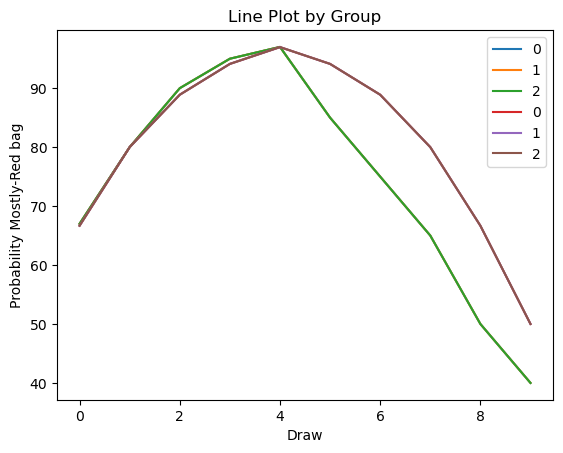

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots()

# Group by 'Group' and plot each line
for group, group_data in df.groupby('session'):
    group_data.plot(x='sub_session', y='ChatGPT_posterior_prob', label=group, ax=ax)
    
for group, group_data in df.groupby('session'):
    group_data.plot(x='sub_session', y='theoritical_posterior_prob', label=group, ax=ax)

# Set labels and title
plt.xlabel('Draw')
plt.ylabel('Probability Mostly-Red bag')
plt.title('Line Plot by Group')

# Show the legend
plt.legend()

# Show the plot
plt.show()